In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [17]:
directory = 'Desktop/wall_cracks'

Class: Negative, Length: 20000


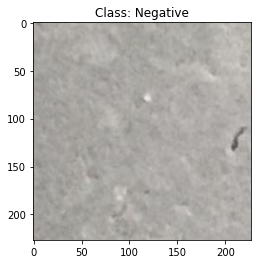

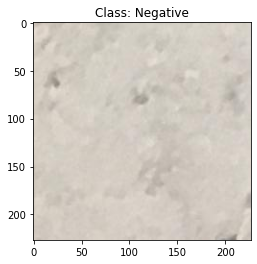

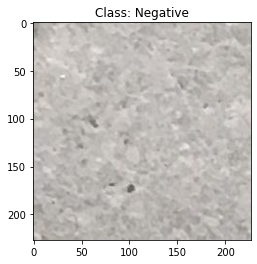

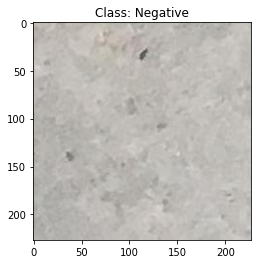

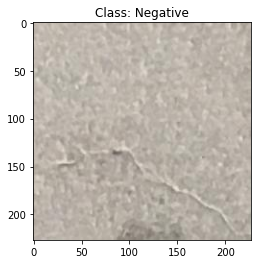

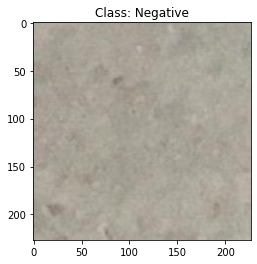

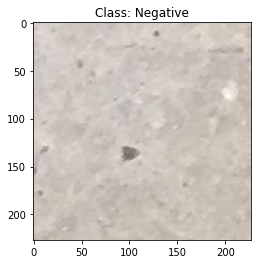

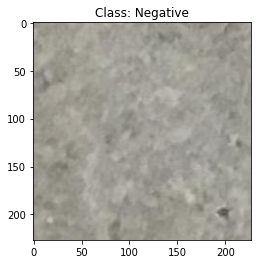

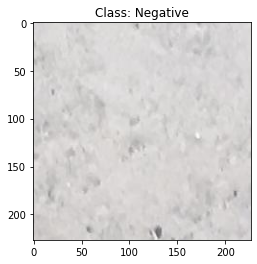

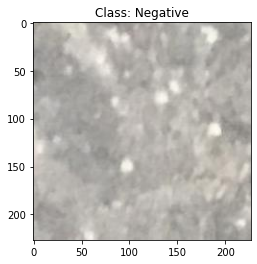

Class: Positive, Length: 20000


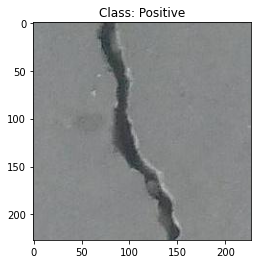

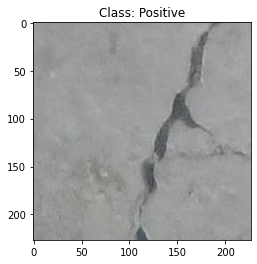

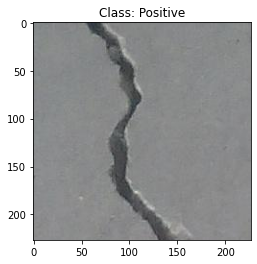

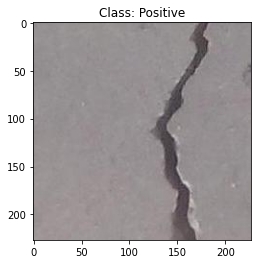

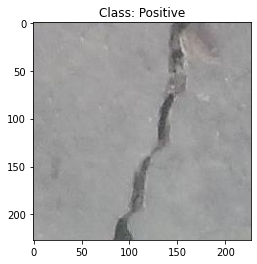

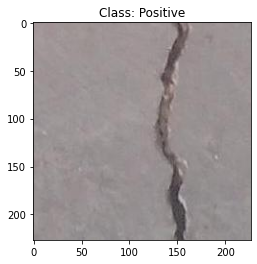

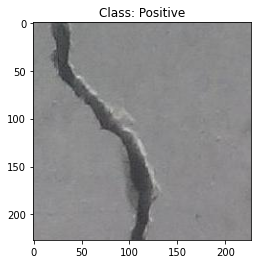

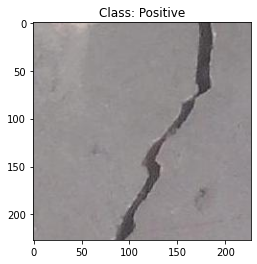

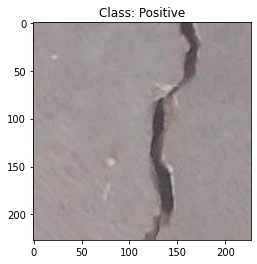

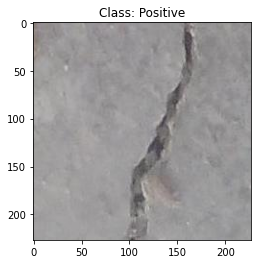

In [18]:
import os
from PIL import Image
for classes in os.listdir(directory):
    class_path = os.path.join(directory, classes)
    img_files = os.listdir(class_path)
    if os.path.isdir(class_path):
            print(f'Class: {classes}, Length: {len(os.listdir(class_path))}')
    for i in range(min(10, len(img_files))):
        img_file = img_files[i]
        img_path = os.path.join(class_path, img_file)
        
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f'Class: {classes}')
        plt.show()
        

In [19]:
data_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          validation_split = 0.2)

In [20]:
train_dataset = data_aug.flow_from_directory(directory,
                                            target_size = (224,224),
                                            subset = 'training')
val_dataset = data_aug.flow_from_directory(directory,
                                          target_size = (224,224),
                                          subset = 'validation')

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [21]:
mobilenet =  tf.keras.applications.MobileNetV2(include_top = False,
                                             input_shape = (224,224, 3),
                                             weights = 'imagenet')

In [22]:
mobilenet.trainable = False

In [23]:
model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Dense(640, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 640)               819840    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1282      
Total params: 3,079,106
Trainable params: 821,122
Non-trainable params: 2,257,984
_________________________________________________________________


In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

In [28]:
history = model.fit(train_dataset , validation_data = val_dataset , epochs = 2)

Epoch 1/2
1000/1000 [==============================] - 1157s 1s/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0077 - val_accuracy: 0.9979
Epoch 2/2
1000/1000 [==============================] - 1359s 1s/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.0114 - val_accuracy: 0.9966
